# Data Understanding - IMDb Dataset

There are 6 CSV files comprising the IMDb dataset. This notebook will seek to understand the source, properties, and business relevance of the IMDb data. In particular, we will explore the structure of the data in each file, inspect individual data elements to understand their properties, and consider the relationships between the data in each file and to the business problem.

## Source

IMDb (Internet Movie Database) is an online database maintained by a subsidiary of Amazon containing information related to millions of films, tv shows, video games, and the like. Cast, production crew, ratings, and reviews are some of the information found on IMDb. Relevant to our problem is information related to movies.

Source: [Wikipedia](https://en.wikipedia.org/wiki/IMDb)

## Properties

Let's begin exploring the data by inspecting its size and shape, along with fields and type. Then, we'll note missing values and inspect individual elements for accuracy.

### Load the data into pandas DataFrames

In [1]:
#import necessary packages for EDA
import pandas as pd
import matplotlib.pyplot as plt

#examine the paths to the IMDb files
!ls ./zippedData/

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [2]:
#load the contents of the files into 6 DataFrames
name_imdb = pd.read_csv('./zippedData/imdb.name.basics.csv.gz')
akas_imdb_title = pd.read_csv('./zippedData/imdb.title.akas.csv.gz')
basics_imdb_title = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
crew_imdb_title = pd.read_csv('./zippedData/imdb.title.crew.csv.gz')
principals_imdb_title = pd.read_csv('./zippedData/imdb.title.principals.csv.gz')
ratings_imdb_title = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')

### Name_imdb

In [3]:
name_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [4]:
name_imdb.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
name_imdb.tail()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


In [7]:
name_imdb['primary_name'].value_counts()

Michael Brown              16
James Brown                16
David Brown                15
Michael Johnson            14
Dinesh                     13
                           ..
Darin Angelov               1
Victor Reuther              1
Bill Sheikh                 1
A.W. Yrjänä                 1
Eliana Álvarez Martínez     1
Name: primary_name, Length: 577203, dtype: int64

In [8]:
name_imdb['nconst'].value_counts()

nm3515180    1
nm3832609    1
nm3571875    1
nm5956842    1
nm9547476    1
            ..
nm4193298    1
nm6879273    1
nm6287340    1
nm1914328    1
nm3410098    1
Name: nconst, Length: 606648, dtype: int64

In [13]:
name_imdb.sort_values('birth_year').head(10)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
555925,nm8572003,Michael Vignola,1.0,NaN,"composer,music_department","tt4099244,tt6417824,tt8200742,tt4600298"
21094,nm0613556,Shikibu Murasaki,973.0,1031.0,writer,"tt0092875,tt0043580,tt0094100,tt0256385"
112096,nm0019604,Dante Alighieri,1265.0,1321.0,"writer,soundtrack","tt1874782,tt7370578,tt1598441,tt1118686"
80184,nm0090504,Giovanni Boccaccio,1313.0,1375.0,writer,"tt0045675,tt0068832,tt0158510,tt5666304"
52088,nm1063158,Cheng'en Wu,1506.0,1581.0,writer,"tt1163129,tt6168860,tt0112778,tt1753783"
52523,nm0148859,Miguel de Cervantes y Saavedra,1547.0,1616.0,"writer,soundtrack","tt0204285,tt6151214,tt0023956,tt0039330"
11901,nm0549265,Christopher Marlowe,1564.0,1593.0,"writer,soundtrack","tt0114279,tt0062898,tt0287837,tt0101798"
59713,nm0000636,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous","tt8632012,tt3894536,tt5932378,tt7344870"
135957,nm2228277,Giambattista Basile,1566.0,1632.0,writer,"tt0177448,tt1212157,tt3278330,tt0061433"
39848,nm0596942,Molière,1622.0,1673.0,"writer,soundtrack,miscellaneous","tt0154249,tt0026069,tt0017448,tt0370853"


In [14]:
name_imdb['primary_profession'].value_counts()

actor                                                        88306
actress                                                      58430
producer                                                     23324
composer                                                     20125
writer                                                       18247
                                                             ...  
costume_department,camera_department,animation_department        1
special_effects,editor,director                                  1
production_designer,actor,cinematographer                        1
actor,executive,legal                                            1
casting_department,music_department,stunts                       1
Name: primary_profession, Length: 8647, dtype: int64

- This data appears to contain records which represent movie industry professionals.
- Each record contains a professional's name in the `primary_name` field; there are no missing values here, but there are common names which collide.
- The `nconst` field appears to be a unique indentifier for each professional.
- The data goes as far back as the 10th century and seems to have an inaccurate `birth_year` of 1.0 for one professional.
- `primary_profession` field has values which are lists of professions; top 5 professions are single professions.
- `known_for_titles` has values which are lists of what appear to be movie ids for which the professional is known.
- Data cleaning will be necessary to make use of the above two fields since the values are lists.
- These two fields also have ~30,000 to 50,000 missing values.
- This data by itself is not immediately useful for evaluating the meaningful features of hit movies, but could be merged with other data along the `known_for_titles` field.
- This data may contain info on more than merely movie industry professionals considering the scope of the birth years.

### akas_imdb_title

In [15]:
akas_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [25]:
akas_imdb_title.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [40]:
akas_imdb_title.tail()

,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


In [23]:
akas_imdb_title['ordering'].value_counts()

1     122302
2      44686
3      41608
4      22586
5      15084
       ...  
59         1
60         1
57         1
56         1
61         1
Name: ordering, Length: 61, dtype: int64

In [26]:
akas_imdb_title[akas_imdb_title['title_id'] == 'tt0369610'].sort_values('ordering')

,title_id,ordering,title,region,language,types,attributes,is_original_title
10,tt0369610,1,Jurassic World: Sauruste maailm,EE,NaN,imdbDisplay,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
32,tt0369610,3,The Gioi Khung Long,VN,NaN,imdbDisplay,NaN,0.0
42,tt0369610,4,Yur dövrü Dünyasi,AZ,NaN,imdbDisplay,NaN,0.0
43,tt0369610,5,Iuruli periodis samyaro,GE,ka,imdbDisplay,NaN,0.0
44,tt0369610,6,Jurassic World,PL,NaN,imdbDisplay,NaN,0.0
45,tt0369610,7,Mundo Jurásico,UY,NaN,NaN,3-D version,0.0
46,tt0369610,8,Jurassic World 3D,PL,NaN,NaN,3-D version,0.0
47,tt0369610,9,Jurassic World - Mundo Jurásico,AR,NaN,imdbDisplay,NaN,0.0
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


In [32]:
len(akas_imdb_title['title_id'].unique())

122302

In [38]:
akas_imdb_title.groupby('is_original_title').count()

,title_id,ordering,title,region,language,types,attributes
is_original_title,,,,,,,
0.0,286978,286978,286978,278381,41711,123747,14925
1.0,44700,44700,44700,6,4,44700,0


In [43]:
len(akas_imdb_title[akas_imdb_title['is_original_title'] == 1.0]['title_id'].unique())

44653

- This data appears to contain records which represent movie titles as they're known in certain regions of the world.
- The `title_id` field probably maps to `known_for_titles` from names_imdb.
- There are 122,302 unique title ids and 44,700 "original" titles.
- Of the 44,700 "original" titles, there are 44,653 unique title ids.
- The `ordering` field starts at 1 and increments for each regional title associated with a title id.
- The original title is designated by 1.0 in the `is_original_title` field and "original" in the `types` field.
- Grouping by `title_id` and filtering to the original title name is probably the best use case for this data.

### basics_imdb_title

In [33]:
basics_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [44]:
basics_imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [45]:
basics_imdb_title.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [46]:
len(basics_imdb_title['tconst'].unique())

146144

In [46]:
basics_imdb_title['start_year'].describe()

count    146144.000000
mean       2014.621798
std           2.733583
min        2010.000000
25%        2012.000000
50%        2015.000000
75%        2017.000000
max        2115.000000
Name: start_year, dtype: float64

In [45]:
basics_imdb_title.sort_values('start_year', ascending=False).head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"


In [44]:
basics_imdb_title['runtime_minutes'].describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [69]:
basics_imdb_title['genres'].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Adult,Horror                       1
Comedy,Music,Thriller              1
Documentary,News,Reality-TV        1
Animation,History,Music            1
Comedy,History,Mystery             1
Name: genres, Length: 1085, dtype: int64

- The records are movie titles, one per row. Each record is a distinct title. There are 146,144 records.
- `tconst` field contains title ids that probably map to the title ids in the other files.
- The titles begin in 2010 and include titles yet to be released.
- There are missing values in the `runtime_minutes` and `genres` fields.
- `genres` has values which are lists of genres.
- This data can act as a dictionary for title ids and movie titles.
- Runtimes and genres could also be useful fields to help evaluate movies.

### crew_imdb_title

In [3]:
crew_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [4]:
crew_imdb_title.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [5]:
crew_imdb_title.tail()

,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


In [6]:
crew_imdb_title['tconst'].value_counts()

tt7935646    1
tt2466162    1
tt6246778    1
tt1988774    1
tt3908792    1
            ..
tt4526922    1
tt6608068    1
tt7765208    1
tt3778616    1
tt3347976    1
Name: tconst, Length: 146144, dtype: int64

- Each record is a movie title. There are distinct title ids, `tconst`, for each row.
- Each record contains lists of directors and writers.
- The `directors` and `writers` fields need cleaned since there are missing values and lists of strings.
- There are 146,144 title ids, which is equivalent to the number of title ids in the basics table.
- By itself this data cannot help evaluate movie potential, but it could be merged with other data along the `tconst` field.

### principals_imdb_title

In [7]:
principals_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [8]:
principals_imdb_title.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [9]:
principals_imdb_title.tail()

,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


In [10]:
len(principals_imdb_title['tconst'].unique())

143454

In [11]:
len(principals_imdb_title['nconst'].unique())

604546

- Each record contains information for a movie title and movie professional pair.
- The number of distinct movie title ids and professional ids is less than in the basics and names tables.
- This is another example of data that needs merged with other tables for value in assessing movie quality.

### ratings_imdb_title

In [12]:
ratings_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
ratings_imdb_title.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [14]:
ratings_imdb_title.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [15]:
ratings_imdb_title['tconst'].value_counts()

tt7935646    1
tt1780890    1
tt6324856    1
tt1627926    1
tt6543086    1
            ..
tt5365036    1
tt9061764    1
tt7054410    1
tt4067162    1
tt7014404    1
Name: tconst, Length: 73856, dtype: int64

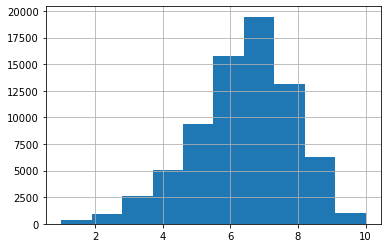

In [17]:
ratings_imdb_title['averagerating'].hist();

<AxesSubplot:>

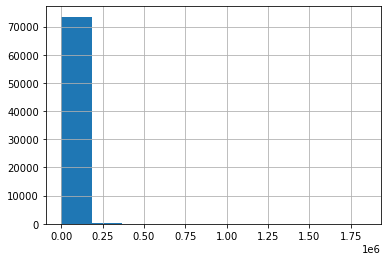

In [40]:
ratings_imdb_title['numvotes'].hist();

In [25]:
ratings_imdb_title['numvotes'].value_counts()

6        2875
5        2699
7        2476
8        2167
9        1929
         ... 
18286       1
16289       1
1958        1
4007        1
4098        1
Name: numvotes, Length: 7349, dtype: int64

In [43]:
ratings_imdb_title[['averagerating', 'numvotes']].describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


- Each record contains rating information for a movie title. Each record has a distinct movie title id.
- Not all title ids from basics table has a rating.
- The median number of votes is 49, but there is at least one outlier of over 1 millions votes.
- This data shows promise for understanding movie quality via the `averagerating` field.